## Loading and Organizing Network Data

We begin by loading the edge list and node metadata using **Polars**.  
The edge list encodes transmission links between cases, while the node table contains case-level information. These statistics summarize connectivity patterns across all outbreak networks and serve as a basis for comparing structural heterogeneity between outbreaks.


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

In [ ]:
edges = pl.read_csv("edgelists1.csv") #loading data
nodes = pl.read_csv("node_info1.csv")
print(edges)

id_list = edges['id'].unique(maintain_order=True).to_list() #keeps the main order
#id_list = sorted(edges['id'].unique().to_list()) #alphabetical sort 
print(id_list)

all_deg = []


def makegraph(a): 
    edges_group = edges.filter(pl.col('id') == a)
    G = nx.from_pandas_edgelist(edges_group, source = 'from', target = 'to') #Get the information from the tables df with node being from, target being to, and edges from connectivity (which one the node is connected to)
    #nx.draw(G, node_color = 'blue', node_size = 10, edgecolors='black', alpha = 0.7) #This draws the graph with specified node color, size, edge color and transparency
    #plt.title(a)  # add a title for each graph
    #plt.show()
    degrees = [d for n, d in G.degree()] #for each node in the node/degree dict, takes just the degrees into a list
    less2 = [d for d in degrees if d < 2]
    p = len(less2)/len(degrees)
    r = 2
    md = np.mean(degrees)
    vd = np.var(degrees)
    return md, vd

mean_degree = []
var_degree = []
for idx in id_list:
    md, vd = makegraph(idx)
    mean_degree.append(md.item())
    var_degree.append(vd.item())
#for i in id_list: #there's 382 networks so idk how we can make all of them and display 
#    makegraph(i)






shape: (3_259, 3)
┌─────────────────────┬──────┬─────┐
│ id                  ┆ from ┆ to  │
│ ---                 ┆ ---  ┆ --- │
│ str                 ┆ str  ┆ str │
╞═════════════════════╪══════╪═════╡
│ aus.2000.meas.1.00  ┆ P1   ┆ P2  │
│ aus.2000.meas.1.00  ┆ P1   ┆ P3  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P4  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P5  │
│ aus.2003.meas.1.00  ┆ P1   ┆ P2  │
│ …                   ┆ …    ┆ …   │
│ rou.2020.covid.1.16 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.17 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.18 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.19 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.20 ┆ P1   ┆ P2  │
└─────────────────────┴──────┴─────┘
['aus.2000.meas.1.00', 'aus.2003.meas.1.00', 'aus.2010.meas.1.00', 'bgd.2001.nph.1.01', 'bgd.2001.nph.1.02', 'bgd.2001.nph.1.03', 'bgd.2001.nph.1.04', 'bgd.2001.nph.1.05', 'bgd.2001.nph.1.06', 'bgd.2001.nph.1.07', 'bgd.2001.nph.1.08', 'bgd.2001.nph.1.11', 'bgd.2001.nph.1.12', 'bgd.2001.nph.1.13', 'bgd.2001.nph.1.14', 'bgd.2001.nph.1.15', 'bgd.2001.nph

In [16]:
mean_degree

[1.6,
 1.9090909090909092,
 1.7777777777777777,
 1.3333333333333333,
 1.6,
 1.6,
 1.6666666666666667,
 1.0,
 1.0,
 1.3333333333333333,
 1.0,
 1.6,
 1.8333333333333333,
 1.0,
 1.5,
 1.7142857142857142,
 1.0,
 1.9411764705882353,
 1.9473684210526316,
 1.9746835443037976,
 1.0,
 1.9714285714285715,
 1.95,
 1.9375,
 1.0,
 1.0,
 1.75,
 1.5,
 1.9393939393939394,
 1.7142857142857142,
 1.935483870967742,
 1.3333333333333333,
 1.3333333333333333,
 1.0,
 1.6666666666666667,
 1.945945945945946,
 1.9714285714285715,
 1.8181818181818181,
 1.7777777777777777,
 1.8666666666666667,
 1.9523809523809523,
 1.6666666666666667,
 1.9090909090909092,
 1.3333333333333333,
 1.8888888888888888,
 1.75,
 1.6666666666666667,
 1.3333333333333333,
 1.0,
 1.5,
 1.0,
 1.9591836734693877,
 1.8571428571428572,
 1.989247311827957,
 1.9393939393939394,
 1.7777777777777777,
 1.951219512195122,
 1.9,
 1.96,
 1.8823529411764706,
 1.9047619047619047,
 1.8888888888888888,
 1.9090909090909092,
 1.9130434782608696,
 1.8823529411

## Mean–Variance Relationship of Secondary Infections

This scatter plot compares the mean number of secondary infections to the variance across outbreak networks, highlighting heterogeneity in transmission dynamics. Outbreaks with similar average transmissibility can exhibit very different levels of dispersion, reflecting the presence or absence of superspreading.


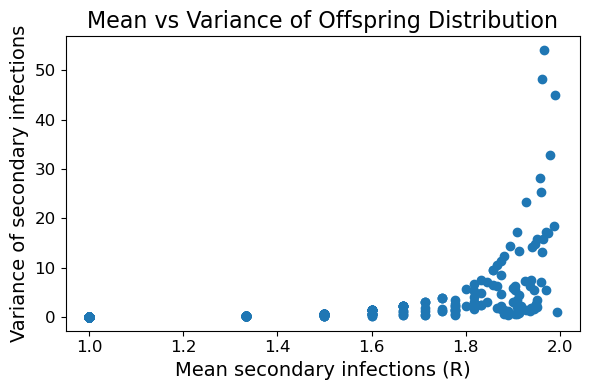

In [26]:
# mean_degree and var_degree assumed to be 1D numpy arrays of same length

plt.figure(figsize=(6, 4))

plt.scatter(mean_degree, var_degree)

plt.xlabel("Mean secondary infections (R)", fontsize=14)
plt.ylabel("Variance of secondary infections", fontsize=14)
plt.title("Mean vs Variance of Offspring Distribution", fontsize=16)

plt.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.savefig("mean_var_scatter.png", dpi=300, bbox_inches="tight")

plt.show()



Loads two CSVs (edgelists1.csv, node_info1.csv) and builds one combined graph over all outbreaks.

(Recommended) Uses composite node IDs like "{id}:{name}" so identical names (e.g., P1) from different outbreaks don’t collide.

Constructs a directed graph (default) so each node’s out-degree = secondary infections; can switch to undirected with use_out_degree=False.

Extracts the degree vector for all nodes (including zeros).

Fits a Negative Binomial (NB) to the empirical degree distribution 


Plots a histogram of degrees (0–30) and overlays the NB PMF using the fitted parameters.

Labels axes/legend and shows the sample mean and variance in the title.

## Combined Degree Distribution with Negative Binomial Fit

This part of the analysis aggregates transmission networks across all diseases to examine the overall distribution of secondary infections per case. A Negative Binomial model is fit to the empirical degree distribution to quantify overdispersion and assess the extent to which superspreading drives transmission heterogeneity at the population level.


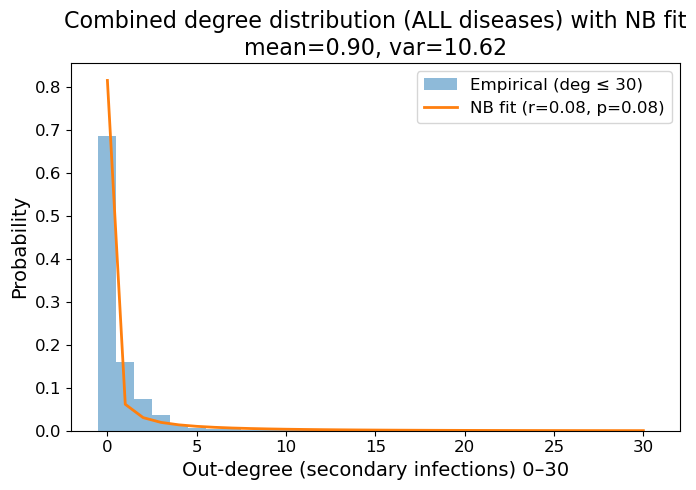

In [27]:
# Plot degree histogram with Negative Binomial (NB) fit — ALL DISEASES COMBINED

import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

EDGES_CSV = "edgelists1.csv"
NODES_CSV = "node_info1.csv"

# --- Helper: method-of-moments NB fit on {0,1,2,...} ---
def fit_nb_mom(deg: np.ndarray):

    if deg.size == 0:
        raise ValueError("Empty degree array.")
    m = deg.mean()
    s2 = deg.var(ddof=1) if deg.size > 1 else 0.0
    if m > 0 and s2 > m:
        r_hat = (m**2) / (s2 - m)
        p_hat = r_hat / (r_hat + m)
    else:
        r_hat = 1e9
        p_hat = r_hat / (r_hat + m) if m > 0 else 0.999999999
    return r_hat, p_hat, m, s2

def main(use_out_degree: bool = True, max_plot: int = 30):
    # Load data
    edges_df = pl.read_csv(EDGES_CSV)
    nodes_df = pl.read_csv(NODES_CSV)

    # Build edge list and node list
    edge_pairs = [(f"{i}:{u}", f"{i}:{v}")
                  for i, u, v in edges_df.select(["id", "from", "to"]).rows()]
    node_names = [f"{i}:{n}" for i, n in nodes_df.select(["id", "name"]).rows()]

    # Graph across ALL diseases
    G = nx.DiGraph() if use_out_degree else nx.Graph()
    G.add_nodes_from(node_names)
    G.add_edges_from(edge_pairs)

    # Degree vector (include zero-degree nodes)
    if use_out_degree and isinstance(G, nx.DiGraph):
        deg = np.array([d for _, d in G.out_degree(node_names)], dtype=float)
        x_label = f"Out-degree (secondary infections) 0–{max_plot}"
    else:
        deg = np.array([d for _, d in G.degree(node_names)], dtype=float)
        x_label = f"Degree 0–{max_plot}"

    if deg.size == 0:
        raise ValueError("Degree sequence is empty after graph construction.")

    # Fit NB
    r_hat, p_hat, m, s2 = fit_nb_mom(deg)

    # Histogram + NB PMF overlay
    deg_int = deg.astype(int)
    xmax = int(deg_int.max())
    x = np.arange(0, min(xmax, max_plot) + 1)
    pmf_nb = nbinom.pmf(x, r_hat, p_hat, loc=0)

    plt.figure(figsize=(7, 5))

    plt.hist(
        deg_int[deg_int <= max_plot],
        bins=np.arange(-0.5, max_plot + 1.5, 1),
        density=True,
        alpha=0.5,
        label=f"Empirical (deg ≤ {max_plot})"
    )

    plt.plot(x, pmf_nb, lw=2, label=f"NB fit (r={r_hat:.2f}, p={p_hat:.2f})")

    plt.xlabel(x_label, fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.title(
        f"Combined degree distribution (ALL diseases) with NB fit\n"
        f"mean={m:.2f}, var={s2:.2f}",
        fontsize=16
    )

    plt.tick_params(axis="both", labelsize=12)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # use_out_degree=True → transmission (secondary infections); False → undirected contact degree
    main(use_out_degree=True, max_plot=30)


## Per-Outbreak Negative Binomial Fits (SARS, MERS, COVID)

For each outbreak, this code computes how many secondary infections each case caused (out-degree) and fits a Negative Binomial distribution using method-of-moments. The histogram + fitted curve allows us to visually compare how dispersed transmission is across SARS, MERS, and COVID.



=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503


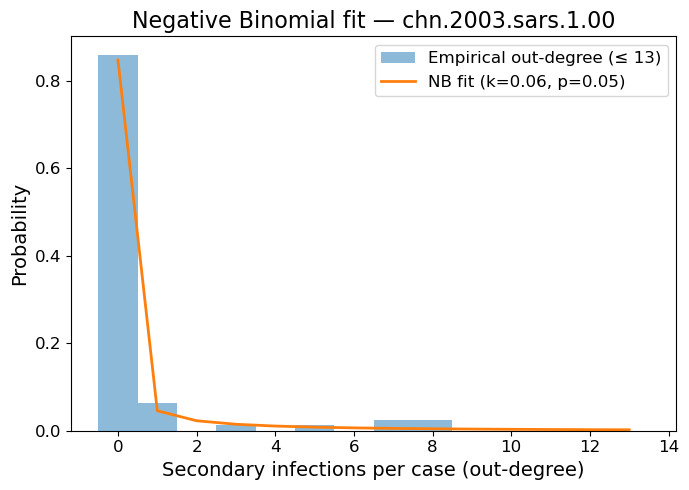


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851


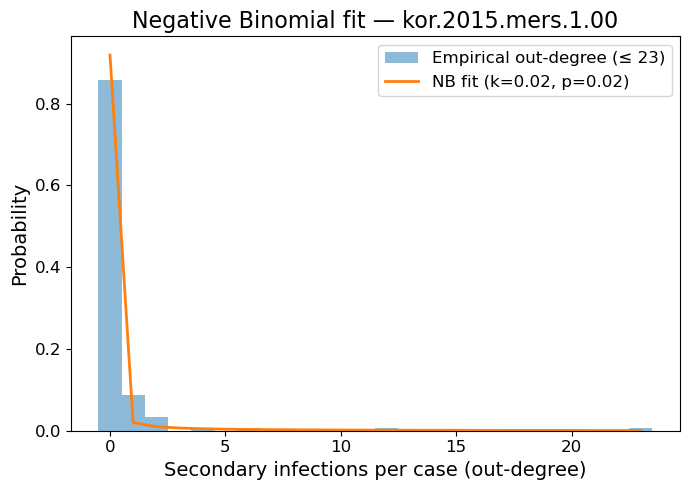


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784


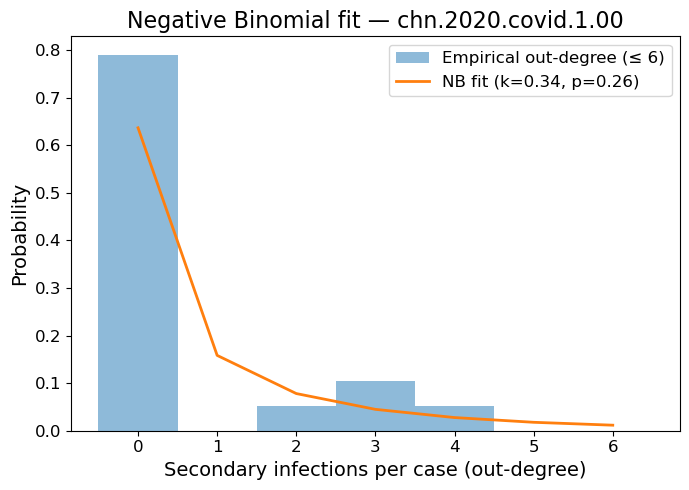

In [28]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# Path to edge list CSV. Expected columns: id, from, to
EDGES_PATH = "edgelists1.csv"

# Outbreak IDs 
TARGET_DISEASES = ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"]

# Load edges (id, from, to) 
edges_df = pl.read_csv(EDGES_PATH)  # columns: id, from, to

# Build a namespaced directed graph
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# Method-of-moments Negative Binomial
def fit_nb_mom(sample):
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0:
        return dict(mean=m, var=s2, k=np.inf, p=1.0)
    if s2 > m:
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        k = 1e12
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# Fit NB and plot per outbreak
for outbreak in TARGET_DISEASES:

    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    H = G.subgraph(nodes_d).copy()
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)
    fit = fit_nb_mom(deg_out)

    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    if len(deg_out) > 0:
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)
        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

        plt.figure(figsize=(7, 5))

        plt.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True,
            alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )

        plt.plot(
            x,
            pmf_nb,
            lw=2,
            label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})"
        )

        plt.xlabel("Secondary infections per case (out-degree)", fontsize=14)
        plt.ylabel("Probability", fontsize=14)
        plt.title(f"Negative Binomial fit — {outbreak}", fontsize=16)

        plt.tick_params(axis="both", labelsize=12)
        plt.legend(fontsize=12)

        plt.tight_layout()
        plt.show()


For each target outbreak ID:

Compute secondary infections per node = how many people each case infected (out-degree).

Plot a scatter of those per-node counts (one figure per disease).

Compute the mean and variance of those counts.

After looping through all diseases, plot a combined scatter of mean vs. variance (one point per disease).

Save a CSV summary (secondary_infection_stats.csv) with the metrics.

# Modeling Superspreading with a Negative Binomial Branching Framework

This section uses empirical transmission data to quantify how secondary infections are distributed across cases and fits a Negative Binomial model to capture heterogeneity and superspreading. The fitted model is then used to simulate branching processes, allowing us to examine outbreak trajectories, final sizes, and extinction behavior across different epidemics.



=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503


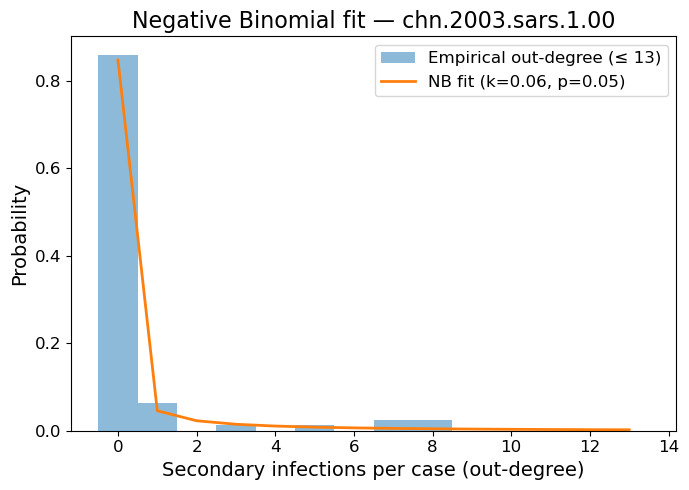

Mean final size over 1000 sims: 171.49
Median final size:                  17.00
Extinction probability by gen 20: 0.963


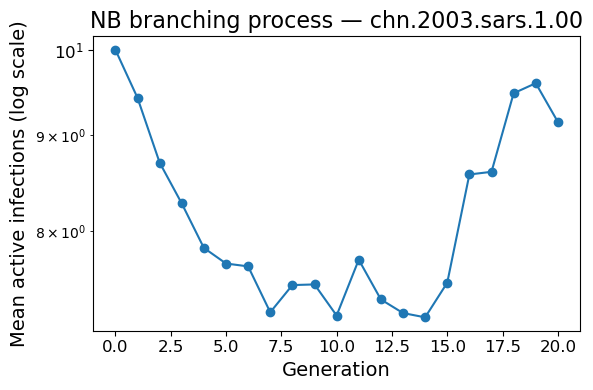


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851


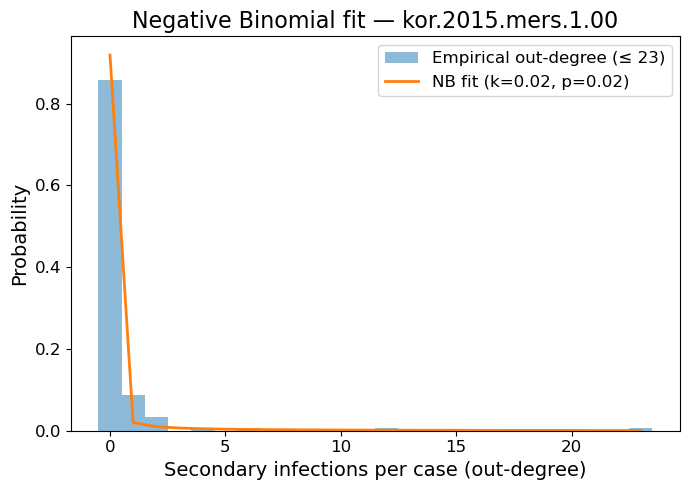

Mean final size over 1000 sims: 216.75
Median final size:                  11.00
Extinction probability by gen 20: 0.976


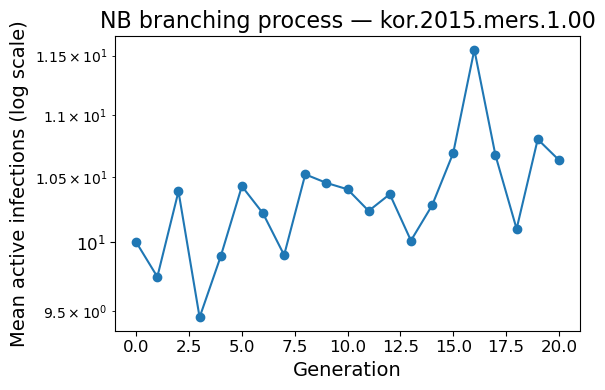


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784


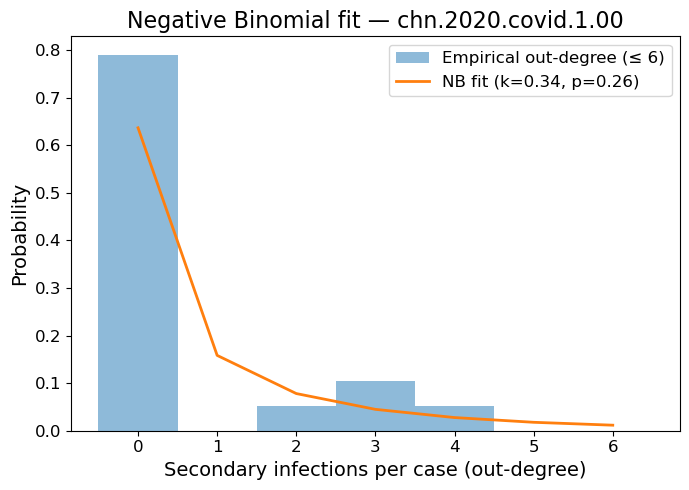

Mean final size over 1000 sims: 131.48
Median final size:                  47.50
Extinction probability by gen 20: 0.871


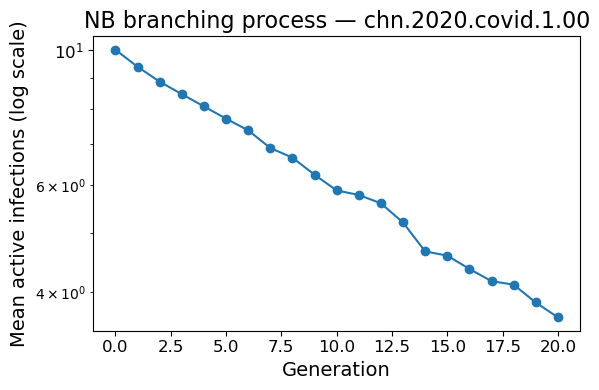

In [29]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)  # expected columns: id, from, to

G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)

    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0

    if m <= 0:
        return dict(mean=m, var=s2, k=np.inf, p=1.0)

    if s2 > m:
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        k = 1e12
        p = k / (k + m)

    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(fit, max_generations=10, initial_cases=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()

    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]

    poisson_like = (k > 1e8) or np.isinf(k)

    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue

        if poisson_like:
            new_cases = np.random.poisson(mu * current)
        else:
            r_total = current * k
            new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases

    return sizes

# -----------------------------
#  Main analysis & simulation
# -----------------------------
rng = np.random.default_rng(42)

for outbreak in TARGET_DISEASES:
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    H = G.subgraph(nodes_d).copy()
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    fit = fit_nb_mom(deg_out)

    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # -------------------------
    #  Plot offspring fit (NB)
    # -------------------------
    if len(deg_out) > 0:
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)

        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

        plt.figure(figsize=(7, 5))
        plt.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True,
            alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        plt.plot(
            x,
            pmf_nb,
            lw=2,
            label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})"
        )

        plt.xlabel("Secondary infections per case (out-degree)", fontsize=14)
        plt.ylabel("Probability", fontsize=14)
        plt.title(f"Negative Binomial fit — {outbreak}", fontsize=16)
        plt.tick_params(axis="both", labelsize=12)
        plt.legend(fontsize=12)

        plt.tight_layout()
        plt.show()

    # -------------------------
    #  Branching process sims
    # -------------------------
    n_sims   = 1000
    max_gen  = 20
    I0       = 10

    trajectories = [
        simulate_branching(fit, max_generations=max_gen, initial_cases=I0, rng=rng)
        for _ in range(n_sims)
    ]

    traj_arr   = np.array(trajectories)
    cum_sizes  = traj_arr.cumsum(axis=1)
    final_size = cum_sizes[:, -1]

    extinctions = (traj_arr[:, -1] == 0)

    print(f"Mean final size over {n_sims} sims: {final_size.mean():.2f}")
    print(f"Median final size:                  {np.median(final_size):.2f}")
    print(f"Extinction probability by gen {max_gen}: {extinctions.mean():.3f}")

    gens = np.arange(max_gen + 1)
    mean_by_gen = traj_arr.mean(axis=0)

    plt.figure(figsize=(6, 4))
    plt.plot(gens, mean_by_gen, marker="o")
    plt.yscale("log")

    plt.xlabel("Generation", fontsize=14)
    plt.ylabel("Mean active infections (log scale)", fontsize=14)
    plt.title(f"NB branching process — {outbreak}", fontsize=16)
    plt.tick_params(axis="both", labelsize=12)

    plt.tight_layout()
    plt.show()


This plot shows the mean number of active infections per generation for the 2015 South Korea MERS outbreak under a branching process with NB offspring. Starting with 10 initial cases, the average number of infections per generation fluctuates around ~10 on a log scale, indicating that the effective reproduction number R is close to 1. The process does not exhibit exponential growth or rapid extinction, but instead shows moderate variability consistent with overdispersed transmission (superspreading). These fluctuations reflect occasional high-transmission events balanced by many zero-transmission individuals, which is characteristic of MERS-CoV dynamics in 2015.

This plot shows the mean number of active infections across generations for the early COVID-19 outbreak in the dataset “chn.2020.covid.1.00,” simulated using a Negative Binomial branching process. The monotonic decline from ~10 to ~3 active infections on a log scale indicates that the effective reproduction number (R) for this cluster is significantly below 1. The smooth downward trend also suggests relatively low transmission heterogeneity. As a result, most transmission chains shrink steadily and ultimately go extinct. This aligns with empirical findings that many early COVID transmission clusters in China during January 2020 were quickly contained and did not display the large superspreading observed later in the pandemic.

# Putting Negative Binomial Fit and Branching Process in one graph for each disease


=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503
Intervention tail-cut k_max (policy-imposed): 5
[No intervention] Mean final size: 171.49
[No intervention] Median final size: 17.00
[No intervention] Extinction prob by gen 20: 0.963
[Intervention] Mean final size: 13.04
[Intervention] Median final size: 12.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: chn.2003.sars.1.00_intervention_compare.png


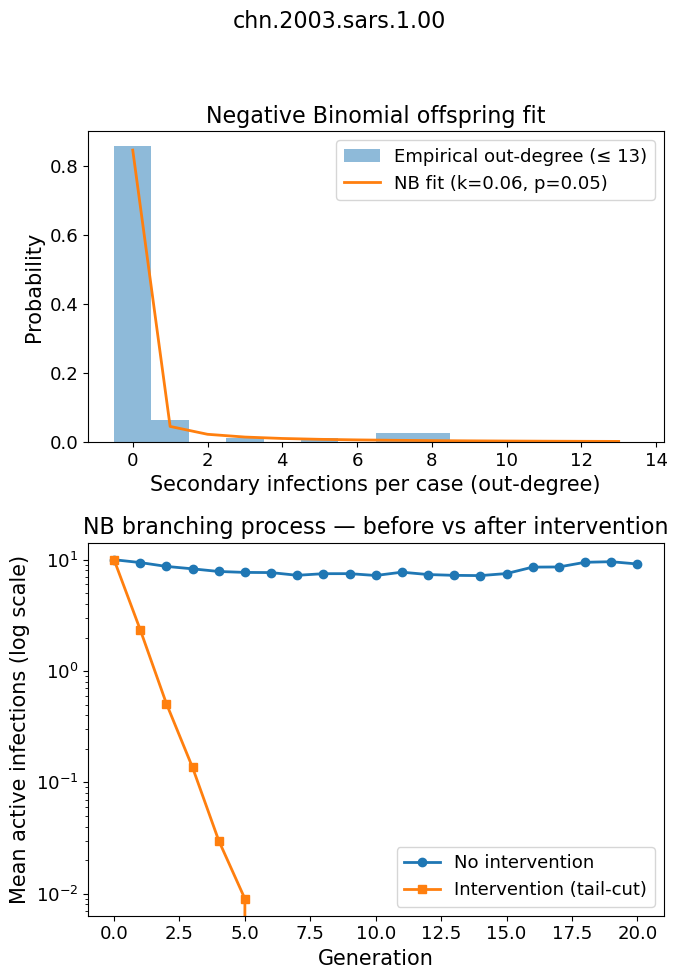


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851
Intervention tail-cut k_max (policy-imposed): 5
[No intervention] Mean final size: 195.35
[No intervention] Median final size: 12.00
[No intervention] Extinction prob by gen 20: 0.975
[Intervention] Mean final size: 11.11
[Intervention] Median final size: 10.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: kor.2015.mers.1.00_intervention_compare.png


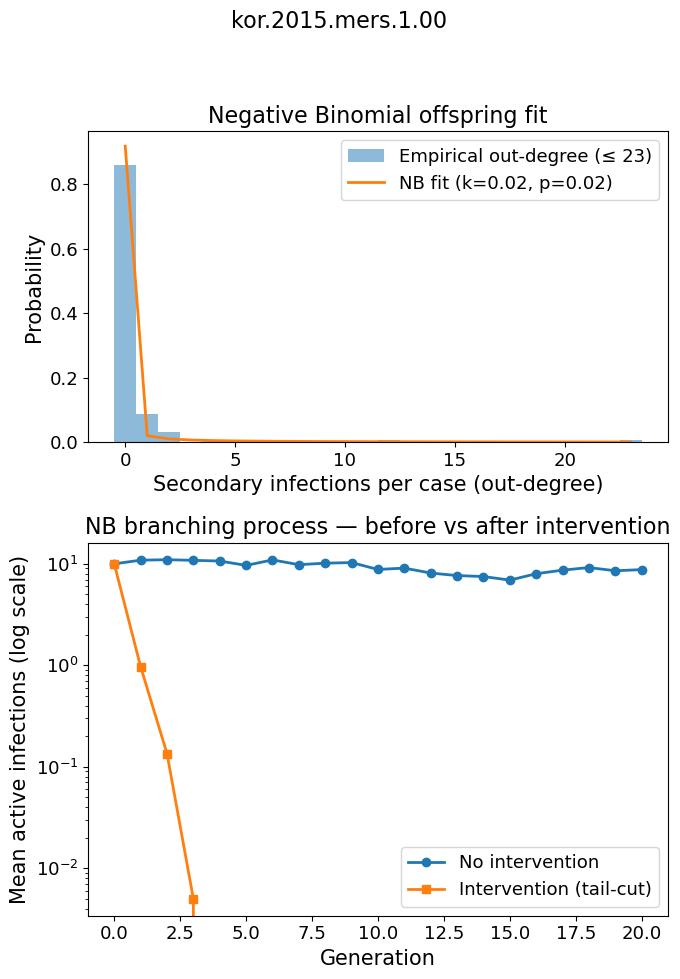


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784
Intervention tail-cut k_max (policy-imposed): 3
[No intervention] Mean final size: 145.85
[No intervention] Median final size: 50.00
[No intervention] Extinction prob by gen 20: 0.855
[Intervention] Mean final size: 19.50
[Intervention] Median final size: 18.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: chn.2020.covid.1.00_intervention_compare.png


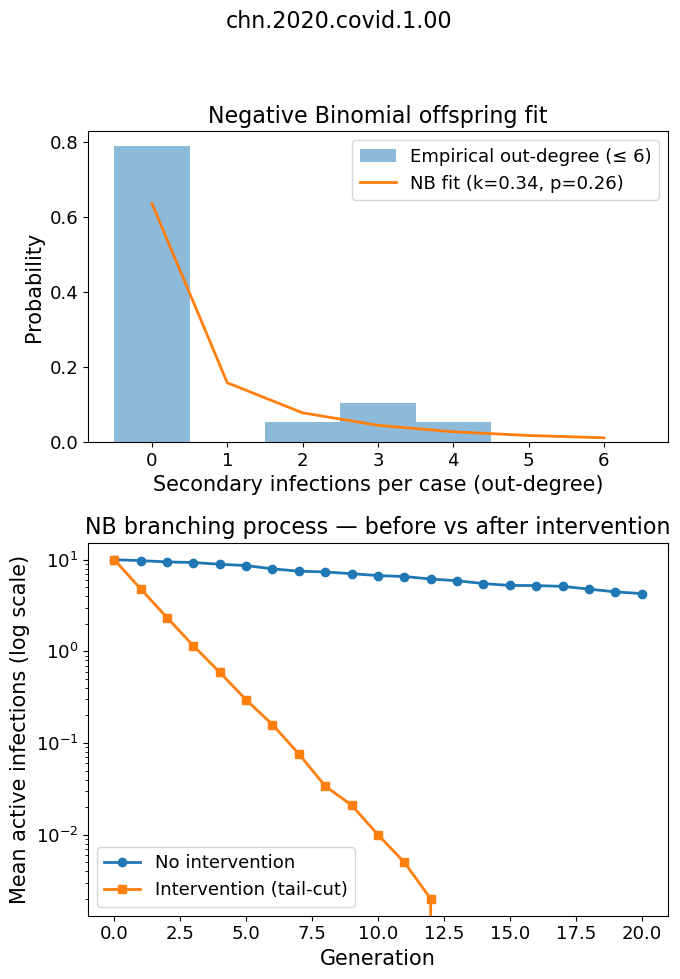

Saved final scatter to: combined_intervention_scatter.png
Saved tailcut effect plot to: tailcut_effect.png


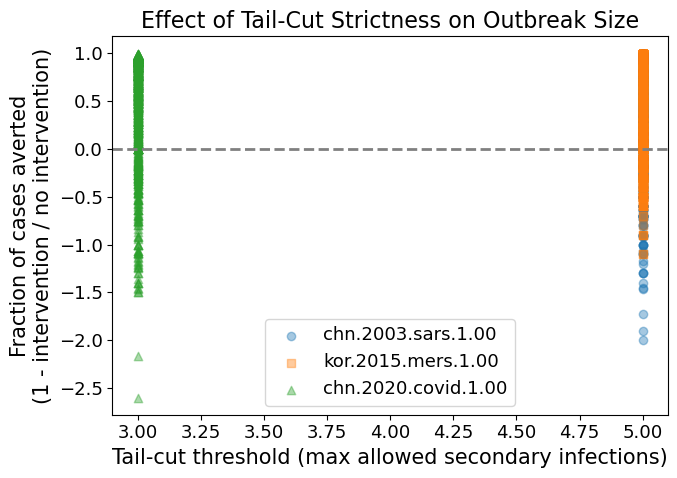

In [45]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 14,          # base font
    "axes.titlesize": 16,     # subplot titles
    "axes.labelsize": 15,     # x/y labels
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "figure.titlesize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})



# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# -----------------------------
#  Intervention settings
# -----------------------------
# How to handle the tail:
#   "resample" -> redraw until offspring <= k_max
#   "cap"      -> if offspring > k_max, set it to k_max
TAIL_METHOD = "resample"

# Number of simulations per scenario per disease
N_SIMS = 1000

# Policy-defined maximum allowed secondary infections per case
# (this is the tail-cut threshold k_max for each disease)
POLICY_CUTOFF = {
    "chn.2003.sars.1.00": 5,  # e.g. cap superspreading at 5 for SARS
    "kor.2015.mers.1.00": 5,  # cap at 5 for MERS
    "chn.2020.covid.1.00": 3, # cap at 3 for COVID-19
}

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)  # expected columns: id, from, to

# Build a namespaced directed graph:
#   node format: "<outbreak_id>:<case_name>" (e.g. "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """
    Fit a Negative Binomial to non-negative integer data via method-of-moments.

    Returns dict:
        - mean: sample mean
        - var:  sample variance (ddof=1)
        - k:    dispersion / "size" parameter
        - p:    success probability in SciPy's nbinom (on {0,1,2,...})

    NB parameterization (epidemic-style):
        Var = m + m^2 / k
        m = k(1-p)/p  =>  p = k / (k + m)
    """
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)

    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0

    if m <= 0:
        # no infections on average; NB not meaningful
        return dict(mean=m, var=s2, k=np.inf, p=1.0)

    if s2 > m:
        # overdispersed → true NB
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # not overdispersed → approximate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)

    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
#  (with optional tail-cut)
# -----------------------------
def simulate_branching(
    fit,
    max_generations=10,
    initial_cases=1,
    rng=None,
    k_max=None,
    tail_method="resample",
):
    """
    Galton–Watson branching process with NB offspring.

    - fit: dict from fit_nb_mom with keys 'mean', 'k', 'p'
    - max_generations: simulate generations G0..G_max
    - initial_cases: number of index cases at generation 0
    - rng: numpy.random.Generator (optional)
    - k_max: if not None, apply tail-cut per case (NB only)
    - tail_method: 'resample' or 'cap'

    Returns:
        list[int] = number of ACTIVE infections per generation [G0, G1, ..., G_max]
    """
    if rng is None:
        rng = np.random.default_rng()

    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]

    # If k is huge or infinite, treat as Poisson-like to avoid huge shape.
    # For Poisson-like case, we ignore k_max and just use aggregate Poisson.
    poisson_like = (k > 1e8) or np.isinf(k)

    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue

        if poisson_like:
            # Sum of current Poisson(mu) RVs ~ Poisson(current * mu)
            new_cases = rng.poisson(mu * current)

        else:
            if k_max is None:
                # No intervention → use aggregate NB property:
                # Sum of current NB(k, p) ~ NB(current * k, p)
                r_total = current * k
                new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)
            else:
                # Intervention: tail-cut per case.
                # Draw NB(k, p) for each case and truncate large values.
                draws = nbinom.rvs(k, p, size=current, loc=0, random_state=rng)

                if tail_method == "cap":
                    draws = np.minimum(draws, k_max)
                elif tail_method == "resample":
                    # Resample only those above k_max
                    mask = draws > k_max
                    while mask.any():
                        draws[mask] = nbinom.rvs(
                            k, p, size=mask.sum(), loc=0, random_state=rng
                        )
                        mask = draws > k_max
                else:
                    raise ValueError("tail_method must be 'resample' or 'cap'.")

                new_cases = int(draws.sum())

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases

    return sizes

# -----------------------------
#  Main analysis & simulation
# -----------------------------
rng = np.random.default_rng(42)

# store final-size results and cutoffs for summary plots
results = {}

for outbreak in TARGET_DISEASES:
    # Collect namespaced nodes that belong to this outbreak
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for this outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit Negative Binomial via method-of-moments
    fit = fit_nb_mom(deg_out)


    # Console summary
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # Policy-imposed tail-cut threshold
    if len(deg_out) > 0:
        k_max_int = POLICY_CUTOFF.get(outbreak, int(deg_out.max()))
    else:
        k_max_int = None

    print(f"Intervention tail-cut k_max (policy-imposed): {k_max_int}")

    # -------------------------
    #  Branching process sims
    #  BEFORE vs AFTER intervention
    # -------------------------
    max_gen  = 20     # generations
    I0       = 10     # starting number of infectious individuals at generation 0

    has_deg = len(deg_out) > 0
    if has_deg:
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)
        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

    # --- No intervention ---
    trajectories_no = [
        simulate_branching(
            fit,
            max_generations=max_gen,
            initial_cases=I0,
            rng=rng,
            k_max=None,               # no tail-cut
        )
        for _ in range(N_SIMS)
    ]

    traj_no_arr   = np.array(trajectories_no)  # (n_sims, max_gen+1)
    cum_no        = traj_no_arr.cumsum(axis=1)
    final_no      = cum_no[:, -1]
    ext_no        = (traj_no_arr[:, -1] == 0)

    print(f"[No intervention] Mean final size: {final_no.mean():.2f}")
    print(f"[No intervention] Median final size: {np.median(final_no):.2f}")
    print(f"[No intervention] Extinction prob by gen {max_gen}: {ext_no.mean():.3f}")

    # --- With intervention (tail-cut) ---
    if k_max_int is not None:
        trajectories_int = [
            simulate_branching(
                fit,
                max_generations=max_gen,
                initial_cases=I0,
                rng=rng,
                k_max=k_max_int,
                tail_method=TAIL_METHOD,
            )
            for _ in range(N_SIMS)
        ]

        traj_int_arr = np.array(trajectories_int)
        cum_int      = traj_int_arr.cumsum(axis=1)
        final_int    = cum_int[:, -1]
        ext_int      = (traj_int_arr[:, -1] == 0)

        print(f"[Intervention] Mean final size: {final_int.mean():.2f}")
        print(f"[Intervention] Median final size: {np.median(final_int):.2f}")
        print(f"[Intervention] Extinction prob by gen {max_gen}: {ext_int.mean():.3f}")
    else:
        # deg_out empty; just stub out a zero array for consistency
        traj_int_arr = np.zeros_like(traj_no_arr)
        final_int    = np.zeros_like(final_no)

    # ---- ONE FIGURE with two panels (offspring fit + branching) ----
    gens = np.arange(max_gen + 1)
    mean_by_gen_no  = traj_no_arr.mean(axis=0)
    mean_by_gen_int = traj_int_arr.mean(axis=0)

    fig, (ax_top, ax_bot) = plt.subplots(
        2, 1,
        figsize=(7, 10),
        gridspec_kw={"height_ratios": [1, 1.2]}
    )
    fig.subplots_adjust(hspace=0.4)

    # Upper: NB offspring fit
    if has_deg:
        ax_top.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True,
            alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        ax_top.plot(
            x,
            pmf_nb,
            lw=2,
            label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})"
        )
        ax_top.set_xlabel("Secondary infections per case (out-degree)")
        ax_top.set_ylabel("Probability")
        ax_top.set_title("Negative Binomial offspring fit")
        ax_top.legend()
    else:
        ax_top.text(
            0.5, 0.5, "No degree data",
            ha="center", va="center", transform=ax_top.transAxes
        )
        ax_top.set_axis_off()

    # Lower: branching process before vs after intervention
    ax_bot.plot(gens, mean_by_gen_no,  marker="o", label="No intervention")
    ax_bot.plot(gens, mean_by_gen_int, marker="s", label="Intervention (tail-cut)")
    ax_bot.set_yscale("log")
    ax_bot.set_xlabel("Generation")
    ax_bot.set_ylabel("Mean active infections (log scale)")
    ax_bot.set_title("NB branching process — before vs after intervention")
    ax_bot.legend()

    fig.suptitle(outbreak, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save per-disease figure for Overleaf
    fname = f"{outbreak}_intervention_compare.png"
    fig.savefig(fname, dpi=300, bbox_inches="tight")
    print(f"Saved figure to: {fname}")
    plt.show()  
    plt.close(fig)

    # Store results for summary plots
    results[outbreak] = {
        "final_no": final_no,
        "final_int": final_int,
        "cutoff": k_max_int,
    }

# -----------------------------
#  Combined scatterplot:
#  final size (no intervention)
#  vs cases averted
# -----------------------------
plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    x = vals["final_no"]
    y = x - vals["final_int"]  # cases averted
    plt.scatter(x, y, alpha=0.4, label=outbreak, marker=marker)

plt.axhline(0, linestyle="--")
plt.xlabel("Final outbreak size (no intervention)")
plt.ylabel("Cases averted (no intervention − intervention)")
plt.title("Tail-cut NB intervention: outbreak size vs cases averted")
plt.legend()
plt.tight_layout()

combined_name = "combined_intervention_scatter.png"
plt.savefig(combined_name, dpi=300, bbox_inches="tight")
print(f"Saved final scatter to: {combined_name}")

plt.close()

# -----------------------------
#  Tail-cut threshold vs fraction of cases averted
# -----------------------------
plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    no = vals["final_no"]
    inter = vals["final_int"]
    cutoff = vals["cutoff"]

    valid = no > 0
    no = no[valid]
    inter = inter[valid]

    frac_averted = 1 - (inter / no)

    plt.scatter(
        np.full_like(frac_averted, cutoff, dtype=float),
        frac_averted,
        alpha=0.4,
        marker=marker,
        label=outbreak,
    )

plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Tail-cut threshold (max allowed secondary infections)")
plt.ylabel("Fraction of cases averted\n(1 - intervention / no intervention)")
plt.title("Effect of Tail-Cut Strictness on Outbreak Size")
plt.legend()
plt.tight_layout()

plt.savefig("tailcut_effect.png", dpi=300, bbox_inches="tight")
print("Saved tailcut effect plot to: tailcut_effect.png")
plt.show()  
plt.close()


## Tail-Cut Threshold vs. Percentage of Cases Averted

This section shows how the strictness of a tail-cut intervention, defined by the maximum allowed number of secondary infections per case, influences total outbreak size. As the cutoff becomes more restrictive, a larger fraction of cases is averted, illustrating the outsized role of superspreading in driving epidemic dynamics.


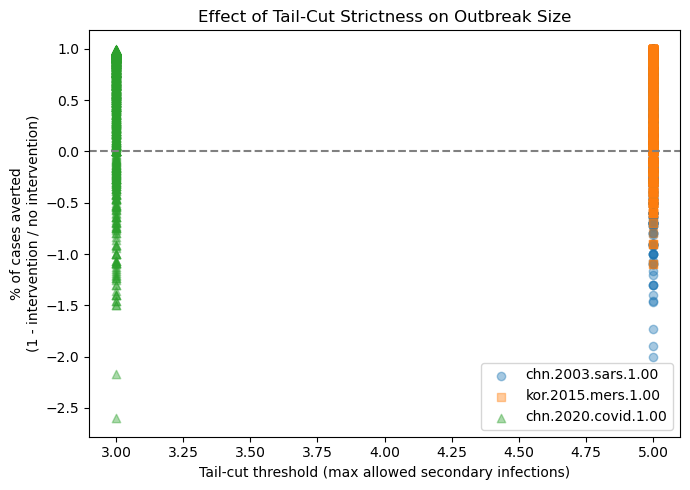

In [23]:
# -----------------------------
#  New plot:
#  Tail-cut threshold vs % cases averted
# -----------------------------

plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    
    # Extract total cases
    no = vals["final_no"]
    inter = vals["final_int"]

    # Fraction remaining
    frac_remaining = inter / no
    
    # Percentage averted
    pct_averted = 1 - frac_remaining

    # X-axis: the cutoff value used (k_max_int)
    # assuming k_max stored already — if not, store it earlier in results dict
    cutoff = vals["cutoff"]  # <-- store when running simulations
    
    plt.scatter(
        np.full_like(pct_averted, cutoff),
        pct_averted,
        alpha=0.4,
        label=outbreak,
        marker=marker
    )

plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Tail-cut threshold (max allowed secondary infections)")
plt.ylabel("% of cases averted\n(1 - intervention / no intervention)")
plt.title("Effect of Tail-Cut Strictness on Outbreak Size")
plt.legend()
plt.tight_layout()

plt.savefig("tailcut_effect.png", dpi=300, bbox_inches="tight")
plt.show()


## Sensitivity Analysis: Tail-Cut Intervention Across All Outbreaks

This code chunk fits a Negative Binomial offspring distribution (method-of-moments) for each outbreak and runs Galton–Watson branching simulations with and without a tail-cut intervention. It then summarizes intervention effectiveness as the **average fraction of cases averted** across outbreaks for a range of tail-cut thresholds (`k_max`), and visualizes both individual-outbreak trajectories (faint lines) and the overall mean response (bold dashed line).


/var/folders/p5/2_569shj6qjbwr0n9q7q3clw0000gn/T/ipykernel_72447/3801057965.py:160: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', num_diseases)


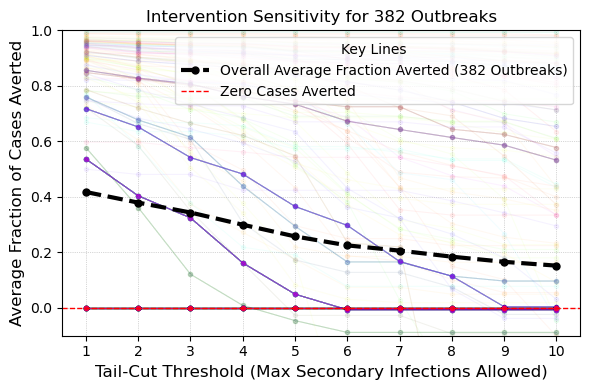

In [24]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from pathlib import Path

# --- File Paths ---
EDGES_PATH = "edgelists1.csv"
NODES_PATH = "node_info1.csv"

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """Fit a Negative Binomial to non-negative integer data via method-of-moments."""
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0 or s2 <= m:
        k = 1e12
        p = k / (k + m) if m > 0 else 1.0
    else:
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(
    fit,
    max_generations=20, 
    initial_cases=1, # Set to 1 case to match your question
    rng=None,
    k_max=None,
    tail_method="cap", 
):
    """Galton–Watson branching process with NB offspring."""
    if rng is None:
        rng = np.random.default_rng()
    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]
    poisson_like = (k > 1e8) or np.isinf(k)
    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue
        
        if poisson_like or k_max is None:
            if poisson_like:
                new_cases = rng.poisson(mu * current)
            else:
                r_total = current * k
                new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)
        else:
            draws = nbinom.rvs(k, p, size=current, loc=0, random_state=rng)
            
            # CAPPING is performed here, ensuring stability (R_int <= R_0)
            if tail_method == "cap":
                draws = np.minimum(draws, k_max)
            else:
                # Resampling logic (not used in this version)
                mask = draws > k_max
                while mask.any():
                    draws[mask] = nbinom.rvs(k, p, size=mask.sum(), loc=0, random_state=rng)
                    mask = draws > k_max
            new_cases = int(draws.sum())

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases
    return sizes

# -----------------------------
#  Main Analysis Function
# -----------------------------
def run_full_sensitivity_analysis():
    # Load data
    edges_df = pd.read_csv(EDGES_PATH)
    nodes_df = pd.read_csv(NODES_PATH)


    # 1. Get ALL unique disease IDs dynamically
    id_list = edges_df['id'].unique().tolist()
    
    # Global simulation parameters
    N_SIMS = 100 # Increased for stability
    MAX_GEN = 100
    I0 = 1 # #THIS IS 1 NOW
    K_MAX_RANGE = np.arange(1, 11) #1-15
    RNG = np.random.default_rng(42)
    TAIL_METHOD = "resample" 

    all_results = []
    
    # All diseases, fit NB, and run simulations
    for outbreak in id_list:
        
        e_outbreak = edges_df[edges_df['id'] == outbreak]
        n_outbreak_names = nodes_df[nodes_df['id'] == outbreak]['name'].unique()
        
        node_to_degree = {n: 0 for n in n_outbreak_names}
        out_counts = e_outbreak.groupby('from')['to'].count().to_dict()
        node_to_degree.update(out_counts)
        deg_out = np.array(list(node_to_degree.values()), dtype=int)
        
        if len(deg_out) < 2 or fit_nb_mom(deg_out)['mean'] == 0:
            continue
        
        fit = fit_nb_mom(deg_out)
        
        #  No interventions og line
        rng_sim = np.random.default_rng(42) 
        trajectories_no = [
            simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng_sim, k_max=None)
            for _ in range(N_SIMS)
        ]
        traj_no_arr = np.array(trajectories_no)
        final_no = traj_no_arr.cumsum(axis=1)[:, -1]
        
        
        # Calculate Mean Final Size (MFS) for the control run (across ALL runs)
        MFS_no = final_no.mean() 
        
        # 4. Run 'Intervention' Scenario for each k_max
        for k_max in K_MAX_RANGE:
            rng_sim = np.random.default_rng(42) 
            trajectories_int = [
                simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng_sim, k_max=k_max, tail_method=TAIL_METHOD)
                for _ in range(N_SIMS)
            ]
            traj_int_arr = np.array(trajectories_int)
            final_int = traj_int_arr.cumsum(axis=1)[:, -1]
            
            # Calculate Mean Final Size (MFS) for the intervention run (across ALL runs)
            MFS_int = final_int.mean() 

            frac_mfs_averted = (MFS_no - MFS_int) / MFS_no #THIS TIME WE KEEP THE EXTINCTION LINES SO WE DON'T BIAS BY HAVING RLY GOOD RESULTS (DISEASE EXTINCTION) NOT COUNTING

            # Store results
            all_results.append({
                "disease": outbreak,
                "k_max": k_max,
                "avg_fraction_averted": frac_mfs_averted,
            })

    # Calculate the overall average effectiveness across ALL diseases
    df_combined = pd.DataFrame(all_results)
    df_average = df_combined.groupby('k_max')['avg_fraction_averted'].mean().reset_index()
    
    #  Plotting Combined Line Plot
    num_diseases = len(df_combined['disease'].unique())
    colors = plt.cm.get_cmap('hsv', num_diseases) 
    
    plt.figure(figsize=(6, 4))
    
    # Plot all individual diseases for background context
    for i, outbreak in enumerate(df_combined['disease'].unique()):
        data = df_combined[df_combined["disease"] == outbreak]
        
        plt.plot(
            data["k_max"].values,
            data["avg_fraction_averted"].values,
            marker='.',
            linestyle='-',
            color=colors(i),
            alpha=0.05, 
            linewidth=0.8
        )

    # Plot the OVERALL AVERAGE line (big so draw attention people see avg)
    plt.plot(
        df_average["k_max"].values,
        df_average["avg_fraction_averted"].values,
        color='black',
        linestyle='--',
        marker='o',
        markersize=5,
        label=f"Overall Average Fraction Averted ({num_diseases} Outbreaks)",
        linewidth=3,
        zorder=10 
    )

    # Add emphasis lines for the 3 key diseases (optional, but good context) #our 3 main ones just so people can differentiate some
    """emphasis_diseases = {
        "chn.2003.sars.1.00": 'blue',
        "kor.2015.mers.1.00": 'purple',
        "chn.2020.covid.1.00": 'red'
    }
    
    for outbreak, color in emphasis_diseases.items():
        if outbreak in df_combined['disease'].unique():
            data = df_combined[df_combined["disease"] == outbreak]
            plt.plot(
                data["k_max"].values,
                data["avg_fraction_averted"].values,
                marker='*',
                linestyle='-',
                color=color,
                label=outbreak,
                alpha=0.05,
                linewidth=2.5
            )""" #commented out section so we don't have emphasis lines cuz that's way too much on one graph

    plt.axhline(0, color='red', linestyle='--', linewidth=1.0, label='Zero Cases Averted')
    plt.xlabel("Tail-Cut Threshold (Max Secondary Infections Allowed)", fontsize=12)
    plt.ylabel("Average Fraction of Cases Averted", fontsize=12)
    plt.title(f"Intervention Sensitivity for {num_diseases} Outbreaks", fontsize=12)
    plt.xticks(K_MAX_RANGE)
    plt.ylim(bottom=-0.1, top=1)
    
    plt.legend(title="Key Lines", loc='upper right', ncol=1)
    plt.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Execute the analysis
run_full_sensitivity_analysis()

#Okay so I think a lot stay at 100% effectiveness because they end up going extinct with the intervention, while without intervention it should technically go to infinite if it is meant to spread with secondary 
# infections avg being greater than 1, but we have to cap the number of simulations so it can't be infinite so it is biased to being 100% effective bc no intervention could technically survive and not die out 
#which would make the # of cases with no intervention extremely high (for the number of generations we allow it to keep reproducing and spreading), which make the average # of cases very high
#BUT THEN avg # of cases with intervention, which go to extinction faster, make the avg # of cases very low, which end up having the 100% cases averted

## Outbreak-Specific Sensitivity Curves (Presentation View)

This figure shows the tail-cut sensitivity curves for all outbreaks individually, without aggregation, to emphasize heterogeneity in intervention response.

/var/folders/p5/2_569shj6qjbwr0n9q7q3clw0000gn/T/ipykernel_72447/3287953417.py:160: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', num_diseases)


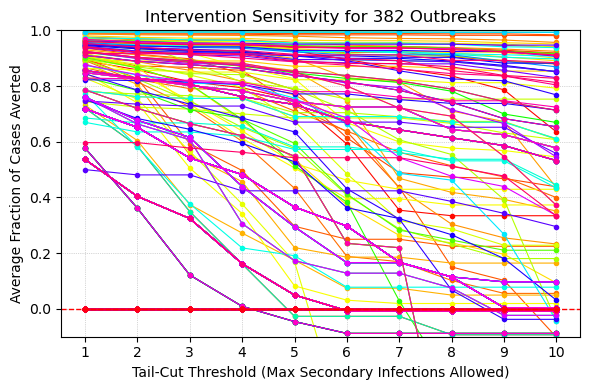

In [25]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from pathlib import Path

# --- File Paths ---
EDGES_PATH = "edgelists1.csv"
NODES_PATH = "node_info1.csv"

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """Fit a Negative Binomial to non-negative integer data via method-of-moments."""
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0 or s2 <= m:
        k = 1e12
        p = k / (k + m) if m > 0 else 1.0
    else:
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(
    fit,
    max_generations=20, 
    initial_cases=1, # Set to 1 case to match your question
    rng=None,
    k_max=None,
    tail_method="cap", 
):
    """Galton–Watson branching process with NB offspring."""
    if rng is None:
        rng = np.random.default_rng()
    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]
    poisson_like = (k > 1e8) or np.isinf(k)
    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue
        
        if poisson_like or k_max is None:
            if poisson_like:
                new_cases = rng.poisson(mu * current)
            else:
                r_total = current * k
                new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)
        else:
            draws = nbinom.rvs(k, p, size=current, loc=0, random_state=rng)
            
            # CAPPING is performed here, ensuring stability (R_int <= R_0)
            if tail_method == "cap":
                draws = np.minimum(draws, k_max)
            else:
                # Resampling logic (not used in this version)
                mask = draws > k_max
                while mask.any():
                    draws[mask] = nbinom.rvs(k, p, size=mask.sum(), loc=0, random_state=rng)
                    mask = draws > k_max
            new_cases = int(draws.sum())

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases
    return sizes

# -----------------------------
#  Main Analysis Function
# -----------------------------
def run_full_sensitivity_analysis():
    # Load data
    edges_df = pd.read_csv(EDGES_PATH)
    nodes_df = pd.read_csv(NODES_PATH)


    # 1. Get ALL unique disease IDs dynamically
    id_list = edges_df['id'].unique().tolist()
    
    # Global simulation parameters
    N_SIMS = 100 # Increased for stability
    MAX_GEN = 100
    I0 = 1 # #THIS IS 1 NOW
    K_MAX_RANGE = np.arange(1, 11) #1-15
    RNG = np.random.default_rng(42)
    TAIL_METHOD = "resample" 

    all_results = []
    
    # All diseases, fit NB, and run simulations
    for outbreak in id_list:
        
        e_outbreak = edges_df[edges_df['id'] == outbreak]
        n_outbreak_names = nodes_df[nodes_df['id'] == outbreak]['name'].unique()
        
        node_to_degree = {n: 0 for n in n_outbreak_names}
        out_counts = e_outbreak.groupby('from')['to'].count().to_dict()
        node_to_degree.update(out_counts)
        deg_out = np.array(list(node_to_degree.values()), dtype=int)
        
        if len(deg_out) < 2 or fit_nb_mom(deg_out)['mean'] == 0:
            continue
        
        fit = fit_nb_mom(deg_out)
        
        #  No interventions og line
        rng_sim = np.random.default_rng(42) 
        trajectories_no = [
            simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng_sim, k_max=None)
            for _ in range(N_SIMS)
        ]
        traj_no_arr = np.array(trajectories_no)
        final_no = traj_no_arr.cumsum(axis=1)[:, -1]
        
        
        # Calculate Mean Final Size (MFS) for the control run (across ALL runs)
        MFS_no = final_no.mean() 
        
        # 4. Run 'Intervention' Scenario for each k_max
        for k_max in K_MAX_RANGE:
            rng_sim = np.random.default_rng(42) 
            trajectories_int = [
                simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng_sim, k_max=k_max, tail_method=TAIL_METHOD)
                for _ in range(N_SIMS)
            ]
            traj_int_arr = np.array(trajectories_int)
            final_int = traj_int_arr.cumsum(axis=1)[:, -1]
            
            # Calculate Mean Final Size (MFS) for the intervention run (across ALL runs)
            MFS_int = final_int.mean() 

            frac_mfs_averted = (MFS_no - MFS_int) / MFS_no #THIS TIME WE KEEP THE EXTINCTION LINES SO WE DON'T BIAS BY HAVING RLY GOOD RESULTS (DISEASE EXTINCTION) NOT COUNTING

            # Store results
            all_results.append({
                "disease": outbreak,
                "k_max": k_max,
                "avg_fraction_averted": frac_mfs_averted,
            })

    # Calculate the overall average effectiveness across ALL diseases
    df_combined = pd.DataFrame(all_results)
    df_average = df_combined.groupby('k_max')['avg_fraction_averted'].mean().reset_index()
    
    #  Plotting Combined Line Plot
    num_diseases = len(df_combined['disease'].unique())
    colors = plt.cm.get_cmap('hsv', num_diseases) 
    
    plt.figure(figsize=(6, 4))
    
    # Plot all individual diseases for background context
    for i, outbreak in enumerate(df_combined['disease'].unique()):
        data = df_combined[df_combined["disease"] == outbreak]
        
        plt.plot(
            data["k_max"].values,
            data["avg_fraction_averted"].values,
            marker='.',
            linestyle='-',
            color=colors(i),
            alpha=1, 
            linewidth=0.8
        )

    # Plot the OVERALL AVERAGE line (big so draw attention people see avg)
    '''plt.plot(
        df_average["k_max"].values,
        df_average["avg_fraction_averted"].values,
        color='black',
        linestyle='--',
        marker='o',
        markersize=5,
        label=f"Overall Average Fraction Averted ({num_diseases} Outbreaks)",
        linewidth=3,
        zorder=10 
    )'''

    # Add emphasis lines for the 3 key diseases (optional, but good context) #our 3 main ones just so people can differentiate some
    """emphasis_diseases = {
        "chn.2003.sars.1.00": 'blue',
        "kor.2015.mers.1.00": 'purple',
        "chn.2020.covid.1.00": 'red'
    }
    
    for outbreak, color in emphasis_diseases.items():
        if outbreak in df_combined['disease'].unique():
            data = df_combined[df_combined["disease"] == outbreak]
            plt.plot(
                data["k_max"].values,
                data["avg_fraction_averted"].values,
                marker='*',
                linestyle='-',
                color=color,
                label=outbreak,
                alpha=0.05,
                linewidth=2.5
            )""" #commented out section so we don't have emphasis lines cuz that's way too much on one graph

    plt.axhline(0, color='red', linestyle='--', linewidth=1.0, label='Zero Cases Averted')
    plt.xlabel("Tail-Cut Threshold (Max Secondary Infections Allowed)")
    plt.ylabel("Average Fraction of Cases Averted")
    plt.title(f"Intervention Sensitivity for {num_diseases} Outbreaks")
    plt.xticks(K_MAX_RANGE)
    plt.ylim(bottom=-0.1, top=1)
    
    #plt.legend(title="Key Lines", loc='upper right', ncol=1)
    plt.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Execute the analysis
run_full_sensitivity_analysis()

#this one not formatted for paper, formatted for presentation viewing so bigger and not super big font size 

chn.2003.sars.1.00: 79 nodes, 78 edges
kor.2015.mers.1.00: 186 nodes, 185 edges
chn.2020.covid.1.00: 20 nodes, 19 edges


/var/folders/p5/2_569shj6qjbwr0n9q7q3clw0000gn/T/ipykernel_72447/3333766085.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


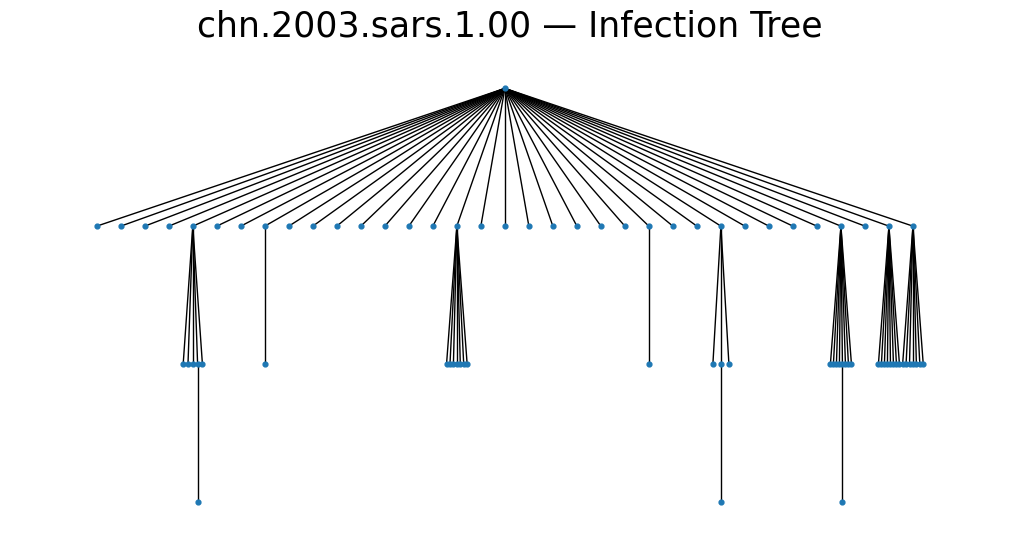

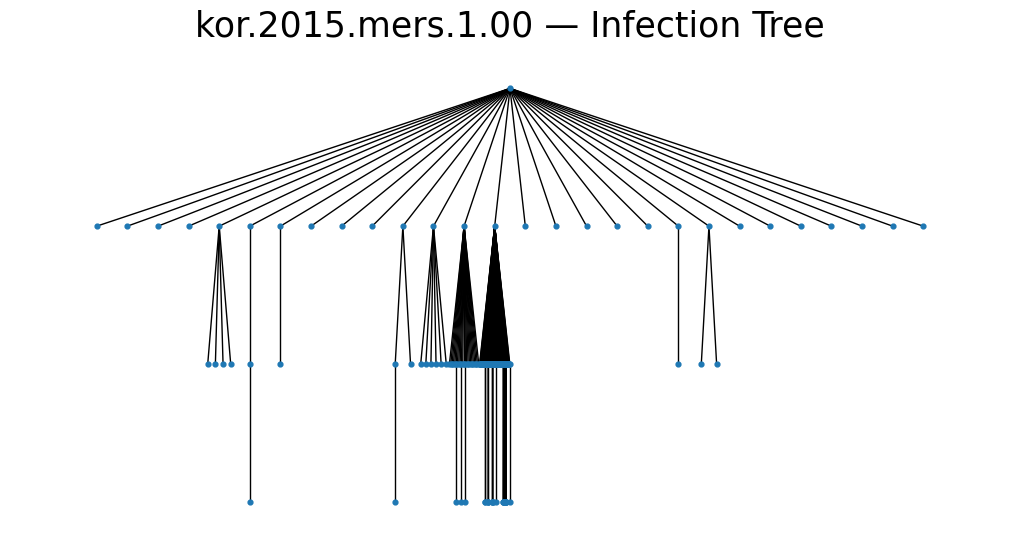

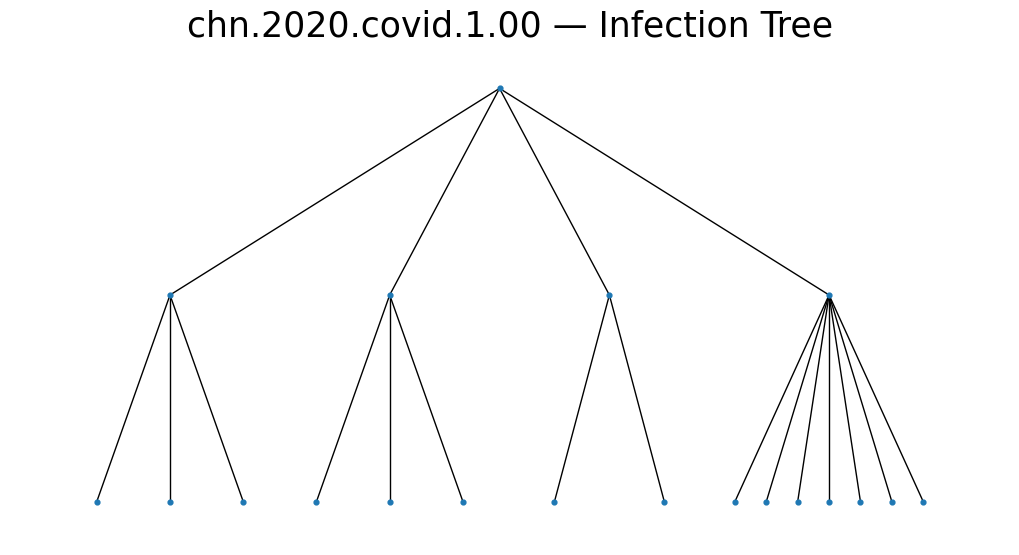

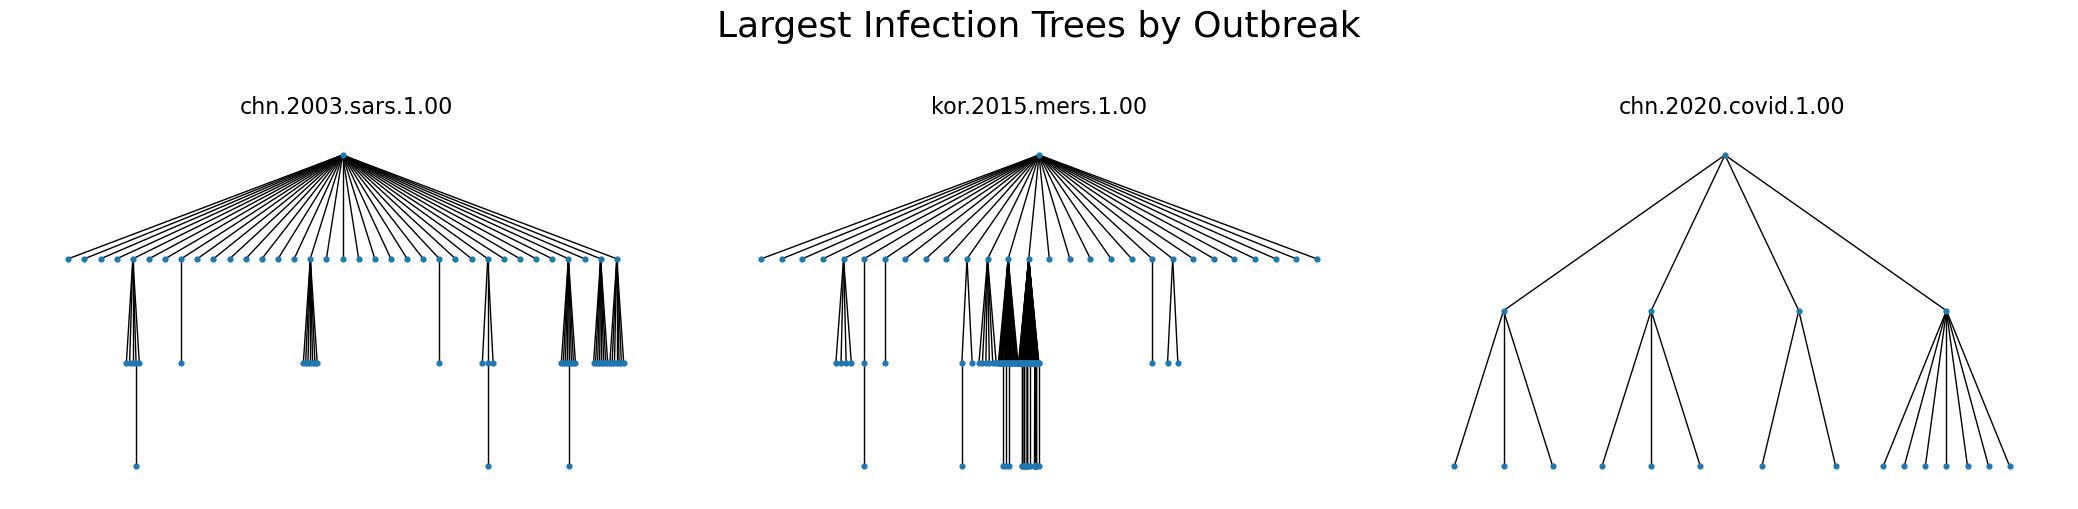

In [42]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    """
    Position nodes in a hierarchy layout for a directed tree.
    Works for any arborescence (each node has ≤ 1 parent).
    """
    if root is None:
        roots = [n for n in G.nodes() if G.in_degree(n) == 0]
        if len(roots) == 0:
            raise ValueError("No root found: graph may have cycles.")
        root = roots[0]

    def _hierarchy_pos(G, root, left, right, vert_loc, pos, parent=None):
        pos[root] = ((left + right) / 2, vert_loc)
        children = [c for c in G.successors(root) if c != parent]
        if children:
            dx = (right - left) / len(children)
            nextx = left
            for child in children:
                next_right = nextx + dx
                _hierarchy_pos(G, child, nextx, next_right, vert_loc - vert_gap, pos, root)
                nextx += dx
        return pos

    pos = _hierarchy_pos(G, root, 0, width, vert_loc, {})
    # Recenter around xcenter (optional nicety)
    xs = np.array([p[0] for p in pos.values()], dtype=float)
    if xs.size > 0:
        shift = xcenter - xs.mean()
        for k in pos:
            pos[k] = (pos[k][0] + shift, pos[k][1])
    return pos


EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# Load edges
edges_df = pl.read_csv(EDGES_PATH)

# Build trees
trees = {}
tree_names = []

for outbreak in TARGET_DISEASES:
    sub_edges = edges_df.filter(pl.col("id") == outbreak)

    G = nx.DiGraph()
    for _, u, v in sub_edges.select(["id", "from", "to"]).rows():
        G.add_edge(u, v)

    if G.number_of_nodes() == 0:
        print(f"[WARN] No edges for {outbreak}, skipping.")
        continue

    components = list(nx.weakly_connected_components(G))
    largest_comp = max(components, key=len)
    H = G.subgraph(largest_comp).copy()

    trees[outbreak] = H
    tree_names.append(outbreak)

    print(f"{outbreak}: {H.number_of_nodes()} nodes, {H.number_of_edges()} edges")


# -------------------------------
# Layout controls (tune these)
# -------------------------------
TREE_WIDTH = 4.0     # bigger = wider spread horizontally
VERT_GAP   = 0.25    # bigger = more vertical spacing
NODE_SIZE  = 12

# --------------------------------------------------
# Draw each tree individually (WIDER + BIG TITLE)
# --------------------------------------------------
for name in tree_names:
    T = trees[name]
    title = f"{name} — Infection Tree"

    # wider canvas
    plt.figure(figsize=(10, 5))

    pos = hierarchy_pos(T, width=TREE_WIDTH, vert_gap=VERT_GAP)
    nx.draw(T, node_size=NODE_SIZE, pos=pos, arrows=False)

    plt.title(title, fontsize=25)   # bigger title
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(f"{name}_tree.png", dpi=300, bbox_inches="tight")
    plt.show()

# --------------------------------------------------
# Combined figure: all trees side by side
# (WIDER panels + BIG per-panel titles + BIG overall title)
# --------------------------------------------------
n = len(tree_names)
fig, axes = plt.subplots(1, n, figsize=(7 * n, 5))

if n == 1:
    axes = [axes]

for ax, name in zip(axes, tree_names):
    T = trees[name]
    title = f"{name}"

    pos = hierarchy_pos(T, width=TREE_WIDTH, vert_gap=VERT_GAP)
    nx.draw(T, ax=ax, node_size=NODE_SIZE, pos=pos, arrows=False)

    ax.set_title(title, fontsize=16)  # bigger subplot title
    ax.axis("off")

fig.suptitle("Largest Infection Trees by Outbreak", fontsize=26, y=1.02)  # big overall title

plt.tight_layout()
plt.savefig("all_trees_side_by_side.png", dpi=300, bbox_inches="tight")
plt.show()
